<a href="https://colab.research.google.com/github/IBREEZZ/Code_Academy_Makeen2/blob/main/Bayes'_Theorem_exponential_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

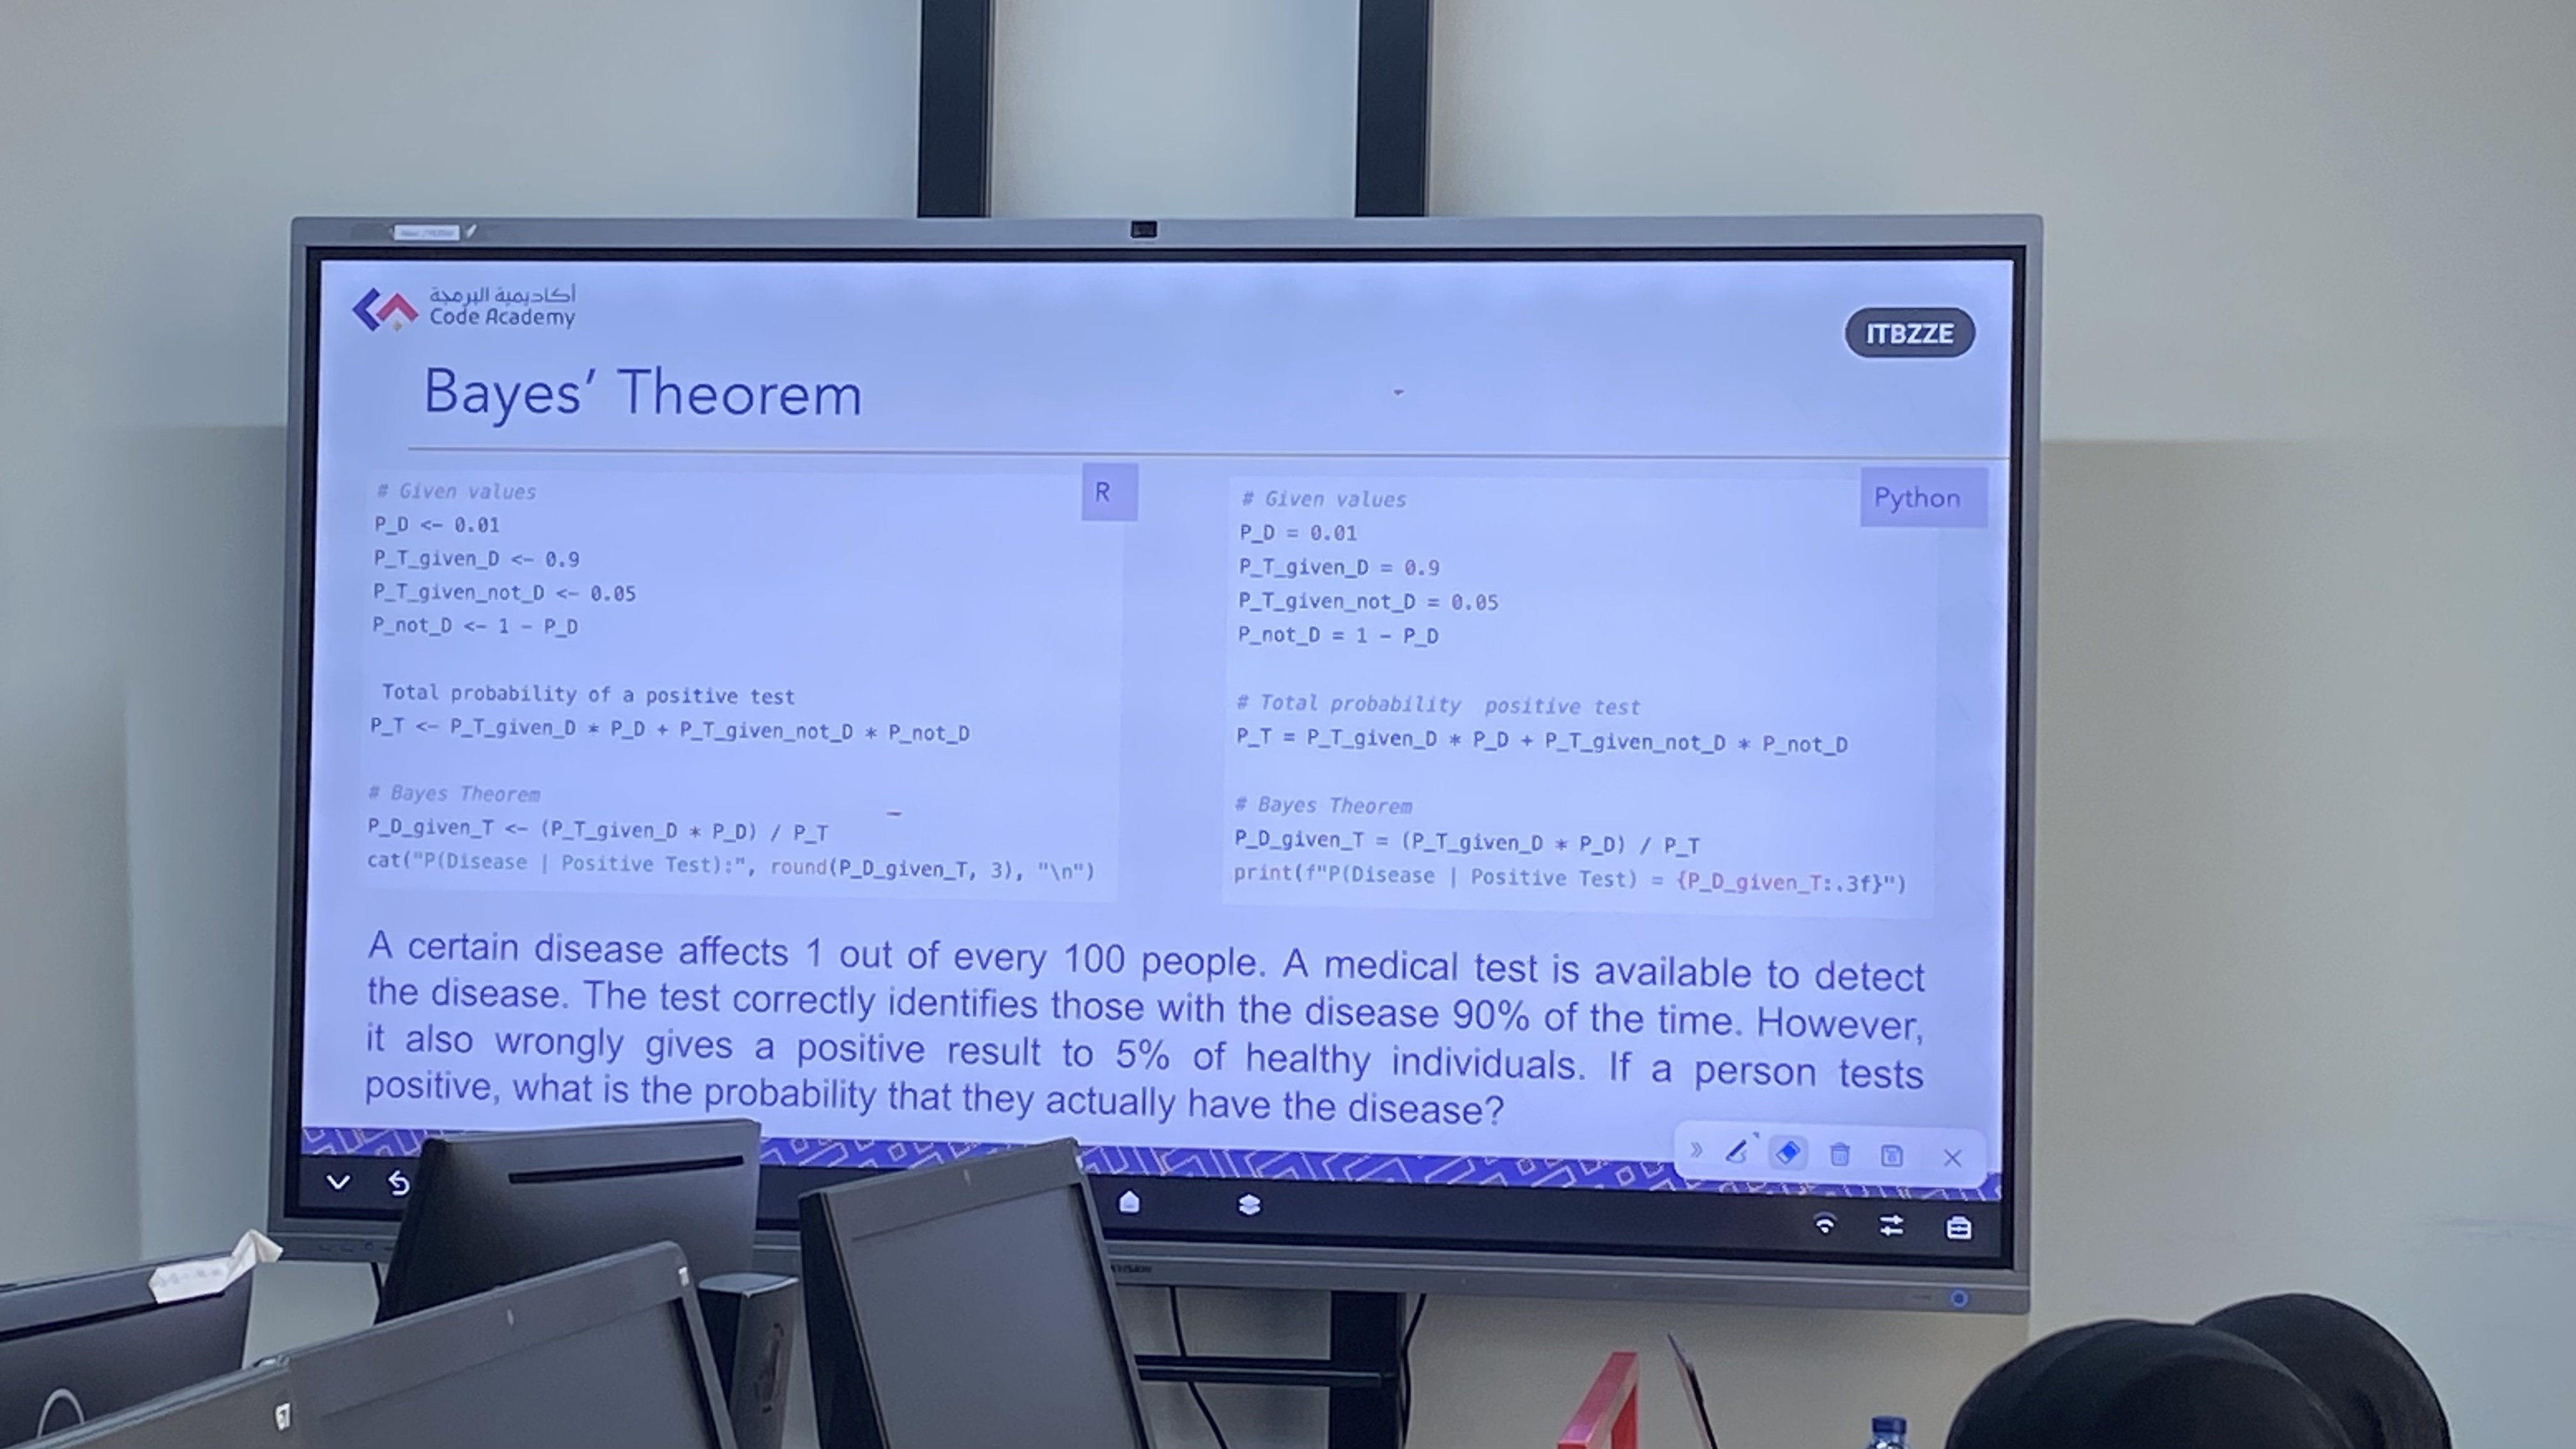

In [3]:
p_d = 0.01
p_t_given_d = 0.9
p_t_given_not_d = 0.05
p_not_d = 1 - p_d

p_t = p_t_given_d * p_d + p_t_given_not_d * p_not_d

p_d_given_t = p_t_given_d * p_d / p_t

print("Disease | Positive Test :" ,round(p_d_given_t,3))

Disease | Positive Test : 0.154


A customer support center receives calls at an average rate of 8 calls per hour. One support agent is available and can handle 10 calls per hour.
-  Simulate the arrival and service of 100 customers using exponential distributions.
-  Calculate how long each customer spends in the system (waiting + service).
- Visualize the results using (e.g boxplot) to show the distribution of time in the system.
- What is the average time spent in the system?
- At what times does the system appear to be most congested?

📞 Average time in system (waiting + service): 28.09 minutes


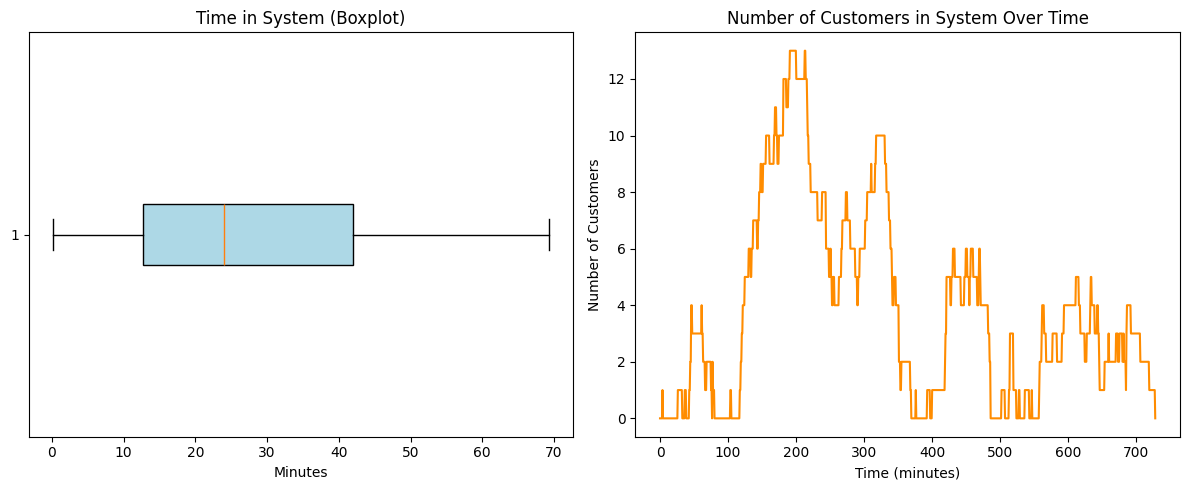

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Basic Parameters
# -------------------------
n_customers = 100          # Total number of customers
arrival_rate = 8           # λ: average 8 calls/hour
service_rate = 10          # μ: agent can serve 10 calls/hour

# Convert to minutes (because easier to read)
mean_interarrival_time = 60 / arrival_rate  # = 7.5 minutes
mean_service_time = 60 / service_rate       # = 6 minutes

# Set seed for consistent random results
np.random.seed(42)

# -------------------------
# Generate Random Times
# -------------------------
# Interarrival times (time between each customer arrival)
interarrival_times = np.random.exponential(mean_interarrival_time, n_customers)

# Service times (how long it takes to serve each customer)
service_times = np.random.exponential(mean_service_time, n_customers)

# Arrival time for each customer (cumulative sum of interarrival times)
arrival_times = np.cumsum(interarrival_times)

# -------------------------
# Simulate Queue (FIFO)
# -------------------------
start_service = np.zeros(n_customers)  # When service starts
end_service = np.zeros(n_customers)    # When service ends
time_in_system = np.zeros(n_customers) # Total time in system

for i in range(n_customers):
    if i == 0:
        # First customer is served upon arrival
        start_service[i] = arrival_times[i]
    else:
        # Service starts after the later of arrival or end of previous customer
        start_service[i] = max(arrival_times[i], end_service[i - 1])

    # End of service = start + service time
    end_service[i] = start_service[i] + service_times[i]

    # Time in system = end - arrival
    time_in_system[i] = end_service[i] - arrival_times[i]

# -------------------------
# Output Average Time
# -------------------------
average_time = np.mean(time_in_system)
print(f"📞 Average time in system (waiting + service): {average_time:.2f} minutes")

# -------------------------
# Plot Boxplot of Time in System
# -------------------------
plt.figure(figsize=(12, 5))

# Boxplot: visualizes spread of time in system
plt.subplot(1, 2, 1)
plt.boxplot(time_in_system, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("Time in System (Boxplot)")
plt.xlabel("Minutes")

# Line plot: how many customers in system at each time
plt.subplot(1, 2, 2)
timeline = np.linspace(0, end_service[-1], 1000)
in_system = [np.sum((arrival_times <= t) & (end_service > t)) for t in timeline]
plt.plot(timeline, in_system, color='darkorange')
plt.title("Number of Customers in System Over Time")
plt.xlabel("Time (minutes)")
plt.ylabel("Number of Customers")

plt.tight_layout()
plt.show()
